<a href="https://colab.research.google.com/github/Requenamar3/Machine-Learning/blob/main/CAP4631C_Assigment2_Spring25_Questions_Group_1_Anays_Garcia%2C_Martha_Requena_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This assignment is about simple and multiple linear regression.

You are going to use the Diamonds data set (a csv file), which you can dowload from Canvas (_located inside the Assignment 2 section_).

Visit the following website to learn more about this data set:

https://bookdown.org/yih_huynh/Guide-to-R-Book/diamonds.html


Read the Diamonds data set as a Pandas data frame following the same steps we have followed multiple times in class.

Call this data frame __diamonds_df__

In [2]:
# Import the required libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
from sklearn.linear_model import LinearRegression  # For regression modeling
from sklearn.metrics import r2_score  # For model evaluation

# Define the URL of the dataset hosted on GitHub
url = "https://raw.githubusercontent.com/Requenamar3/Machine-Learning/refs/heads/main/diamonds_data.csv"

# Load the dataset into a Pandas DataFrame
diamonds_df = pd.read_csv(url)

# Display information about the dataset
print("Dataset Information:")
diamonds_df.info()  # Shows column names, data types, and missing values

print("\nFirst 5 Rows of the Dataset:")
diamonds_df.head()  # Displays the first 5 rows of the dataset


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB

First 5 Rows of the Dataset:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


We are going to remove all the qualitative variables (I want you to use only quantitative predictors for this assignment).

__AFTER you have created the diamonds_df data frame__, run the following code cell to remove all the qualitative variables from it:

In [3]:
diamonds_df.drop (['cut', 'color', 'clarity'], axis= 1, inplace= True)

You __MUST run the previous code cell__ because you CANNOT use any of the qualitative columns as predictors.

The __target (outcome) variable__ in this problem will be __price__.

__The predictors__ will be all remaning columns.

---

# Question 1: Simple LR


## 1a) Select the best predictor that you consider should be used to run a simple regression with price as the outcome. __JUSTIFY__ your selection.

__Note:__ The justification for selecting the best predictor MUST be statistical. You should select what the best predictor is from a statistical point of view.

In [4]:
price_corr = diamonds_df.corr()['price'].drop('price')
price_corr

,price
carat,0.921591
depth,-0.010647
table,0.127134
x,0.884435
y,0.865421
z,0.861249


In [5]:
best_predictor = price_corr.idxmax()  # Variable with the highest correlation
best_corr_value = price_corr.max()

print(f"The best predictor is {best_predictor} with a correlation of {best_corr_value:.2f}.")

The best predictor is carat with a correlation of 0.92.


From the correlation analysis, the predictor with the highest absolute correlation with price is carat ( 𝑟 = 0.9216 r=0.9216). This makes sense because carat (weight of the diamond) directly influences its value, and the high correlation indicates a strong linear relationship between carat and price. Using carat as the predictor maximizes the ability of the simple linear regression model to explain the variability in price.

## 1b) Run a simple linear regression between price and the variable you chose in 1a). __Write the resulting equation__.


In [6]:

# Define predictor (e.g., 'carat') and target ('price')
carat = diamonds_df['carat'].values.reshape(-1, 1)  # Reshape to 2D array
y = diamonds_df['price'].values  # Target variable

# Train the model
model_carat = LinearRegression().fit(carat, y)

# Extract coefficients
intercept = model_carat.intercept_
slope = model_carat.coef_[0]

# Print the regression equation
print(f"Regression equation: price = {intercept:.2f} + {slope:.2f} * carat")


Regression equation: price = -2256.36 + 7756.43 * carat


## 1c) Let's say you want to use the Residual Standard Error (RSE) as the metric to assess the quality of the equation obtained in 1b. __Compute__ the value of RSE and, based on this value, __comment__ on the quality of the equation.

__Note__: Your commentary MUST meet the standard of a student who already took an intermediate-level Stat class and is currently taking a ML class. Making comments like this: "The value of RSE is low, so the equation is good" (__or similar superficial comments__) will NOT be considered valid and will be marked as incorrect.

In [7]:
from sklearn.metrics import r2_score

In [8]:
y_pred_carat = model_carat.predict(carat)

In [9]:
def rse_calculator (y_actual, y_predicted, p):

  rse_value = np.sqrt ( np.sum((y_actual - y_predicted)**2) / (y_actual.size - p -1) )

  return np.round (rse_value, 4)

In [22]:
rse_carat= rse_calculator(y, y_pred_carat, 1)
rse_carat

1548.5619

The RSE is 1548.56 meaning the model's predictions are, on average about 1548 off from the actual prices. Considering diamond prices range from a few thousand to much higher, this isn’t bad, but it does show the model isn’t perfect.
This suggests that while carat is an important factor in predicting price, it doesn’t explain everything. Other features like clarity, cut, or color probably also play a big role and could improve the accuracy of the model if included. Overall, the model does a decent job but could be better with more predictors.

## 1d) (8 points) **Challenge question**

This is a challenge question; thus, you **cannot ask me for guidance on how to answer it**.

Do the plot of the residuals versus the predicted values based on the model you obtained in 1 b.

What do you think about the following statement?

_The plot shows the residuals randomly varying around zero. The residuals do not show any observable pattern._


__Question__: Is the statement correct? Why or why not? __JUSTIFY__.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


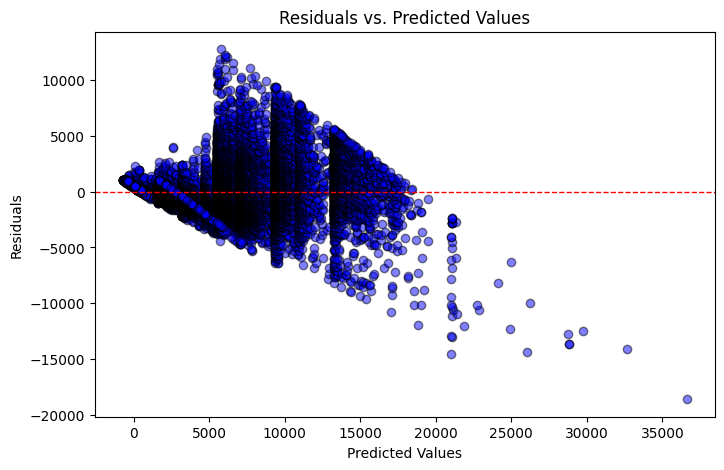

In [11]:
# Define the features used in the model
X = diamonds_df[['carat']]  # Replace with actual features used for training

# Predicted values from the model
predicted_values = model_carat.predict(X)

# Residuals (actual - predicted)
residuals = diamonds_df['price'] - predicted_values

# Create the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(predicted_values, residuals, alpha=0.5, color='blue', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Horizontal line at residual = 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()



No the statement is incorrect. The plot reveals  the residuals fan out as the predicted values increase, forming a funnel-like shape. This indicates that the variability of the residuals isn't consistent across all levels of the predicted values—. This is what is known as heteroscedasticity.

In simpler terms, our model's errors grow as the predicted prices increase, suggesting that the model doesn't capture all the factors influencing diamond prices. This pattern implies that the relationship between carat and price might not be purely linear, or that other variables (like cut, color, or clarity) are affecting the price but aren't included in the model.

---

# Question 2: Multiple LR

## 2a) Use the ML approach to decide whether adding the predictor 'x' in the model that only includes 'carat' is beneficial. Notice that 'x' is one of the columns from the diamonds_df dataframe.


__Note__: You will get all the points **if you apply the ML approach EXACTLY as we did it in class**. You will be **deducted points** if you follow a different procedure.


Define predictors

In [12]:
carat_x = diamonds_df[['carat', 'x']]  # variable  with 'carat' and 'x'

Train the model

In [19]:
# Train the Linear Regression model with 'carat' and 'x'
model_carat_x = LinearRegression().fit(carat_x, y) #creating the model
y_pred_carat_x = model_carat_x.predict(carat_x) # creating the prediction

rse_carat_x = rse_calculator(y, y_pred_carat_x, carat_x.shape[1])
print(f"Residual Standard Error (RSE) for the diamonds data: {rse_carat_x}")


Residual Standard Error (RSE) for the diamonds data: 1527.3562


In [23]:
# The formula calculates the relative change in RSE as a percentage
percentage_reduction_rse = ((rse_carat_x - rse_carat) / rse_carat) * 100
percentage_reduction_rse

-1.3693801972010275

 **The RSE result suggests that adding predictor 'x' to the model increases the RSE by about 136.94%, meaning the model performs worse with 'x' included. This indicates that 'x' is not a beneficial addition to the model.**

## 2b) (10 points) **Challenge question**

This is a challenge question; thus, you **cannot ask me for guidance on how to answer it**.



Regardless of your decision in 2a (that is, regardless of whether you concluded that adding 'x' to the equation was beneficial) __I want you to use both 'x' and 'carat' as predictors in part b__.

__Use the equation with both 'x' and 'carat' to predict the price for 5 new diamonds.__ To do so, you need to do the following:

* Obtain the equation with these two predictors _using the training data_.

In [24]:
# Train the Linear Regression model with 'carat' and 'x'


# Extract coefficients and intercept
coefficients = model_carat_x.coef_
intercept = model_carat_x.intercept_

# Print the equation of the model
print(f"Equation: y = {intercept:.4f} + {coefficients[0]:.4f}*carat + {coefficients[1]:.4f}*x")


Equation: y = 1737.9497 + 10125.9877*carat + -1026.8569*x


- Create 5 values for each of the two predictors. You must create values for these predictors that make sense (i.e., within the range of the values taken by each variable) and explain why you selected these values.

In [27]:
print(diamonds_df[['carat', 'x']].describe())


              carat             x
count  53940.000000  53940.000000
mean       0.797940      5.731157
std        0.474011      1.121761
min        0.200000      0.000000
25%        0.400000      4.710000
50%        0.700000      5.700000
75%        1.040000      6.540000
max        5.010000     10.740000


In [26]:
# New values for 'carat', 'x', and placeholder for 'y'
new_values = pd.DataFrame({
    'carat': [0.5, 0.8, 1.0, 1.5, 2.0],  # New carat values
    'x': [4.5, 5.0, 5.5, 6.0, 6.5],      # New x values
    'y': [None, None, None, None, None]  # Placeholder for target variable if not available
})


# Concatenate the existing DataFrame with the new values
New_diamonds_df = pd.concat([diamonds_df, new_values], ignore_index=True)

# Print the updated DataFrame
print(New_diamonds_df)


       carat  depth  table  price     x     y     z
0       0.23   61.5   55.0  326.0  3.95  3.98  2.43
1       0.21   59.8   61.0  326.0  3.89  3.84  2.31
2       0.23   56.9   65.0  327.0  4.05  4.07  2.31
3       0.29   62.4   58.0  334.0  4.20  4.23  2.63
4       0.31   63.3   58.0  335.0  4.34  4.35  2.75
...      ...    ...    ...    ...   ...   ...   ...
53940   0.50    NaN    NaN    NaN  4.50   NaN   NaN
53941   0.80    NaN    NaN    NaN  5.00   NaN   NaN
53942   1.00    NaN    NaN    NaN  5.50   NaN   NaN
53943   1.50    NaN    NaN    NaN  6.00   NaN   NaN
53944   2.00    NaN    NaN    NaN  6.50   NaN   NaN

[53945 rows x 7 columns]


<ipython-input-26-aeebd93e82f3>:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  New_diamonds_df = pd.concat([diamonds_df, new_values], ignore_index=True)


We used the `describe()` function to select values that represent diamonds across a range of common sizes in the data. This helps ensure the model can make predictions for smaller, average, and slightly larger diamonds while keeping the values realistic. By focusing on key percentiles like the 25th, 50th, and 75th, we aimed to cover a balanced spread of the data and reflect what’s typical for the dataset.

* Use the values you created and the equation to predict the price for these 5 new diamonds.

In [29]:
# Coefficients and intercept from the model
intercept = 1737.9497
coefficients = [10125.9877, -1026.8569]  # [carat coefficient, x coefficient]

# New values for 'carat' and 'x'
new_carat_values = [0.5, 0.8, 1.0, 1.5, 2.0]
new_x_values = [4.5, 5.0, 5.5, 6.0, 6.5]

# Calculate predictions using the equation
predicted_prices = [
    intercept + coefficients[0] * carat + coefficients[1] * x
    for carat, x in zip(new_carat_values, new_x_values)
]

# Display the predictions
for i, price in enumerate(predicted_prices):
    print(f"Diamond {i + 1}: Predicted Price = ${price:.2f}")


Diamond 1: Predicted Price = $2180.09
Diamond 2: Predicted Price = $4704.46
Diamond 3: Predicted Price = $6216.22
Diamond 4: Predicted Price = $10765.79
Diamond 5: Predicted Price = $15315.36


---

# Question 3: Reading question (10 points)

From section 3.3.3 of the book, read the ideas discussed on the fourth bullet point (Outliers).

The last paragraph ends with this fragment:

"_However, care should be taken, since an outlier may instead indicate a
deficiency with the model, such as a missing predictor._"

__Answer two questions about this fragment (the questions are about this SPECIFIC FRAGMENT!)__:

What do they mean when they say that an outlier may indicate a missing predictor?

***Outliers are data points where the actual value is way off from what the model predicts. When this happens, it might not just be a random fluke or an error in the data—it could be the model itself that’s incomplete. The model might be missing an important factor (or predictor) that explains why the outlier doesn’t fit.***

How  can you detect this " possible" missing predictors?

1. **Residual Patterns:** Analyze the residuals (the differences between actual and predicted values). If there’s a pattern in the residuals—like they increase or decrease systematically—it suggests the model is missing an important predictor.

2. **Correlation with Residuals:** Check if the residuals are correlated with variables not included in the model. A strong correlation indicates that variable might explain the variation in the outliers.

3. **Domain Knowledge:** Think about the problem context. Ask yourself if there are logical factors affecting the outcome that the model doesn’t yet include. For example, clarity and cut are critical for diamond prices.

4. **Investigate Outliers:** Look at the characteristics of the outliers. If they share something in common (e.g., high clarity or unique dimensions), that feature might be the missing predictor.

5. **Iterative Testing:** Add suspected predictors to the model and check if they reduce residual errors, improve \(R^2\), or lower metrics like RSE
